In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import math
from functions import split_dataset_LSTM, train_model_LSTM
%matplotlib inline

In [5]:
df = pd.read_csv("datasets/nasd_input.csv", header=None, sep='\t')
print("Number of rows and columns:", df.shape)
# df.head(5)

time_array = np.array([x for x in range(len(df.columns))])
df2 = pd.DataFrame(time_array)

N = 5  # number of time series from dataset
look_back = 60
sc = MinMaxScaler(feature_range=(0, 1))

Number of rows and columns: (100, 731)


(450, 60, 1)
(220, 60, 1)
Epoch 1/10
15/15 [==============================] - 1s 89ms/step - loss: 0.1117
Epoch 2/10
15/15 [==============================] - 1s 87ms/step - loss: 0.0256
Epoch 3/10
15/15 [==============================] - 2s 112ms/step - loss: 0.0171
Epoch 4/10
15/15 [==============================] - 2s 166ms/step - loss: 0.0136 1s - l
Epoch 5/10
15/15 [==============================] - 1s 87ms/step - loss: 0.0131
Epoch 6/10
15/15 [==============================] - 1s 86ms/step - loss: 0.0151
Epoch 7/10
15/15 [==============================] - 1s 85ms/step - loss: 0.0142
Epoch 8/10
15/15 [==============================] - 1s 87ms/step - loss: 0.0122
Epoch 9/10
15/15 [==============================] - 1s 86ms/step - loss: 0.0149
Epoch 10/10
15/15 [==============================] - 2s 114ms/step - loss: 0.0131


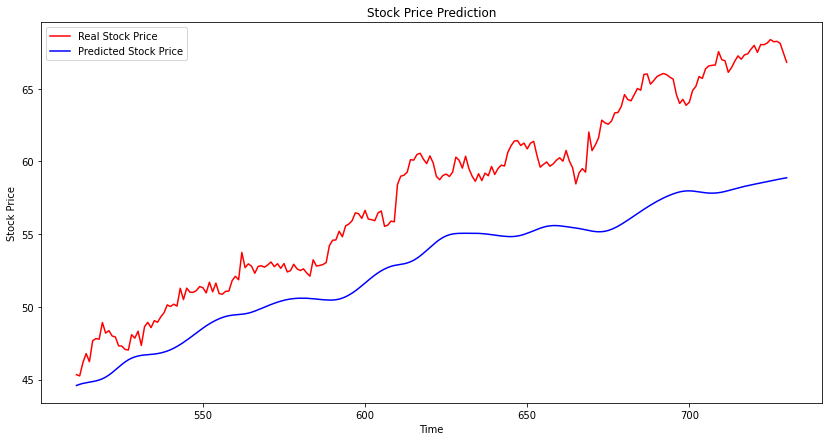

(450, 60, 1)
(220, 60, 1)
Epoch 1/10
15/15 [==============================] - 1s 83ms/step - loss: 0.0376
Epoch 2/10
15/15 [==============================] - 1s 84ms/step - loss: 0.0149
Epoch 3/10
15/15 [==============================] - 1s 82ms/step - loss: 0.0131
Epoch 4/10
15/15 [==============================] - 1s 77ms/step - loss: 0.0117
Epoch 5/10
15/15 [==============================] - 1s 89ms/step - loss: 0.0111
Epoch 6/10
15/15 [==============================] - 1s 87ms/step - loss: 0.0107
Epoch 7/10
15/15 [==============================] - 1s 89ms/step - loss: 0.0118
Epoch 8/10
15/15 [==============================] - 1s 91ms/step - loss: 0.0098
Epoch 9/10
15/15 [==============================] - 1s 94ms/step - loss: 0.0082
Epoch 10/10
15/15 [==============================] - 1s 84ms/step - loss: 0.0086


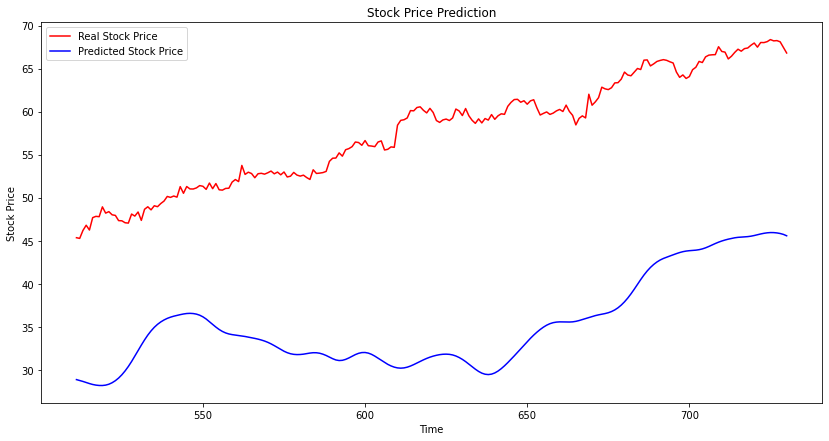

(450, 60, 1)
(220, 60, 1)
Epoch 1/10
15/15 [==============================] - 1s 79ms/step - loss: 0.0583
Epoch 2/10
15/15 [==============================] - 1s 82ms/step - loss: 0.0181
Epoch 3/10
15/15 [==============================] - 1s 81ms/step - loss: 0.0106
Epoch 4/10
15/15 [==============================] - 1s 90ms/step - loss: 0.0103
Epoch 5/10
15/15 [==============================] - 1s 94ms/step - loss: 0.0088
Epoch 6/10
15/15 [==============================] - 1s 88ms/step - loss: 0.0080
Epoch 7/10
15/15 [==============================] - 1s 87ms/step - loss: 0.0075
Epoch 8/10
15/15 [==============================] - 1s 83ms/step - loss: 0.0066
Epoch 9/10
15/15 [==============================] - 1s 88ms/step - loss: 0.0075
Epoch 10/10
15/15 [==============================] - 1s 85ms/step - loss: 0.0070


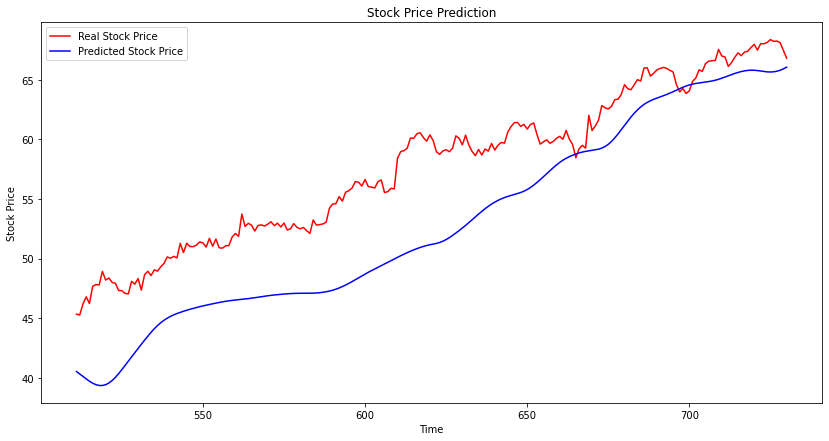

(450, 60, 1)
(220, 60, 1)
Epoch 1/10
15/15 [==============================] - 1s 85ms/step - loss: 0.0657
Epoch 2/10
15/15 [==============================] - 2s 126ms/step - loss: 0.0194
Epoch 3/10
15/15 [==============================] - 1s 93ms/step - loss: 0.0162
Epoch 4/10
15/15 [==============================] - 1s 82ms/step - loss: 0.0160
Epoch 5/10
15/15 [==============================] - 1s 84ms/step - loss: 0.0128
Epoch 6/10
15/15 [==============================] - 1s 85ms/step - loss: 0.0149
Epoch 7/10
15/15 [==============================] - 1s 87ms/step - loss: 0.0115
Epoch 8/10
15/15 [==============================] - 1s 99ms/step - loss: 0.0098
Epoch 9/10
15/15 [==============================] - 1s 97ms/step - loss: 0.0109
Epoch 10/10
15/15 [==============================] - 1s 99ms/step - loss: 0.0092


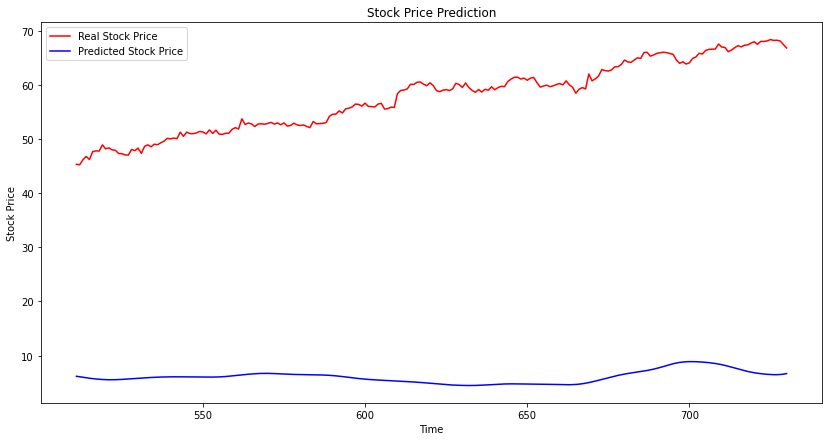

(450, 60, 1)
(220, 60, 1)
Epoch 1/10
15/15 [==============================] - 1s 99ms/step - loss: 0.0792
Epoch 2/10
15/15 [==============================] - 1s 91ms/step - loss: 0.0181
Epoch 3/10
15/15 [==============================] - 1s 93ms/step - loss: 0.0151
Epoch 4/10
15/15 [==============================] - 1s 92ms/step - loss: 0.0166
Epoch 5/10
15/15 [==============================] - 1s 93ms/step - loss: 0.0131
Epoch 6/10
15/15 [==============================] - 1s 92ms/step - loss: 0.0129
Epoch 7/10
15/15 [==============================] - 1s 95ms/step - loss: 0.0116
Epoch 8/10
15/15 [==============================] - 1s 93ms/step - loss: 0.0120
Epoch 9/10
15/15 [==============================] - 2s 101ms/step - loss: 0.0129
Epoch 10/10
15/15 [==============================] - 1s 95ms/step - loss: 0.0107


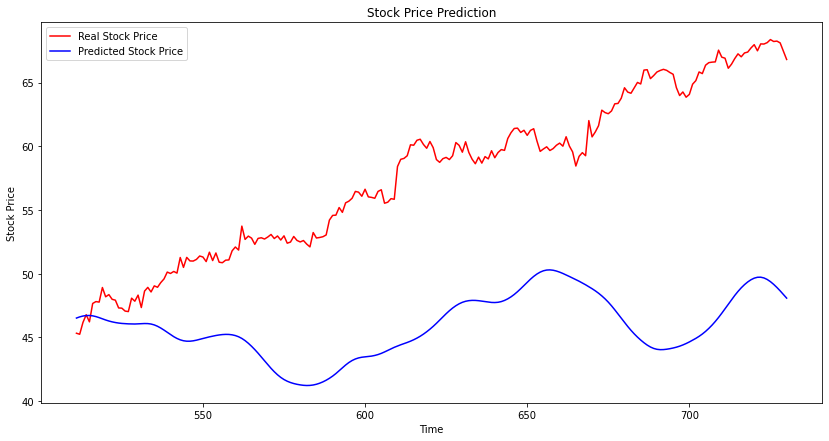

In [6]:
for i in range(N):
    # Creating a data structure with 'look_back' time-steps and 1 output
    X_train, y_train, X_test, train_size = split_dataset_LSTM(df, i, 0.7, sc, look_back)

    print(X_train.shape)
    print(X_test.shape)

    model = train_model_LSTM(X_train, y_train)

    # Getting the predicted stock price
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Visualising the results
    plt.figure(figsize=(14, 7))
    plt.plot(df2.iloc[train_size:].values, df.iloc[0, train_size:].values,
            color='red', label='Real Stock Price')
    plt.plot(df2.iloc[train_size:].values, predicted_stock_price,
            color='blue', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()